# 6.5 분류 알고리즘 성능 비교

Source : https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine/notebook

- fixed acidity : 결합 산도
- volatile acidity : 휘발성 산도
- citric acid : 시트르산
- residual sugar : 잔류 설탕
- chlorides : 염화물
- free sulfur dioxide : 자유 이산화황
- total sulfur dioxide : 총 이산화황
- density : 밀도
- pH : 페하(용액의 수소 이온 농도 지수. 0에서 14까지 있으며, 7미만은 산성을, 7이상은 알칼리성을 나타냄)
- sulphates : 황산염 
- alcohol : 알코올
- quality : 품질 (0 ~ 10점)

포도주 평가 데이터를 읽고 내용을 살펴보는 코드는 아래와 같다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [4]:
wine = pd.read_csv('winequality-red.csv')
print(wine.shape)
wine.head(5)

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

- 이진 분류 문제로 바꾸기 위해서 포도주의 품질이 좋고 나쁜 것을 나누는 기준 설정을 7,8점을 상품, 6점 이하를 하품으로 나누겠다.

- 이를 위해서 6.5를 기준으로 bad(0) good(1)으로 나눈다. 이것은 임의로 나눈 것이다.

In [7]:
my_bins = (2.5, 6.5, 8.5)
groups = [0,1]
wine['qual'] = pd.cut(wine['quality'], bins = my_bins, labels = groups)

wine['qual'].value_counts()

0    1382
1     217
Name: qual, dtype: int64

In [8]:
X = wine.drop(['quality', 'qual'], axis = 1)
y = wine['qual']

y.value_counts()

0    1382
1     217
Name: qual, dtype: int64

- 표준 스케일링을 한 후 다양한 알고리즘 적용 시의 점수(정확도)를 비교하면 아래와 같다.

In [17]:
sc = StandardScaler()
X = sc.fit_transform(X)

np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [18]:
# 선형 분류
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)


/Users/heojeong-wook/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.83125

In [19]:
# 결정트리
# from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

TypeError: object of type 'CategoricalDtype' has no len()

In [22]:
# 랜덤 포레스트
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

TypeError: object of type 'CategoricalDtype' has no len()

# Feature Engineering

In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn.feature_selection import SelectPercentile
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn. manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

- 표준 스케일링을 한 입력 데이터를 X_all에 저장하여 사용하겠다.

In [27]:
cancer = load_breast_cancer()
X_all = cancer.data
y = cancer.target
sc = StandardScaler()
X_all = sc.fit_transform(X_all)

X_all.shape

(569, 30)

- 30개의 특성 이름은 아래와 같다.

In [28]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

- 30개의 특성을 모두 사용하고 랜덤 포레스트를 사용한 경우의 분류 성능은 다음과 같다. 교차검증을 수행하겠다.

In [37]:
rfc = RandomForestClassifier(n_estimators=300)
cross_val_score(rfc, X_all, y, cv=5).mean().round(4)

0.9598

- 상위 20%의 유효한 특성 즉 6개의 특성만 선태하여 분류를 수행하는 코드는 아래의 코드와 같이 SelectPercentile 함수를 사용한다.
- 첫 번째 인자에 데이터를 검정하여 나눌 기준인 카이제곱(chi2) 을, 두 번째 인자에 퍼센트를 입력하면 전체 데이터의 상위 20%만을 추출한다.
- 특성 선택은 기본적으로 카이제곱 검증을 사용하여 가장 관련성이 높은 속성을 찾아준다. 카이제곱 검증은 상관관계를 계산하여 우연히 어떤 현상이 발생한 것인지 아니면 충분히 연관성이 있는지를 알려주는 방법이다.
- 선택된 컬럼의 이름을 알 수 없으므로 fs.get_support를 사용하여 선택된 열을 불리언 형식으로 표현하고 (True, False, ...)이를 사용하면 선택된 컬럼의 이름을 얻고 데이터 프레임으로 변환하여 출려했다.

In [30]:
fs = SelectPercentile(feature_selection.chi2, percentile = 20)
X_P = fs.fit_transform(cancer.data, y)
X_P = sc.fit_transform(X_P)
cancer.feature_names[fs.get_support()]

array(['mean perimeter', 'mean area', 'area error', 'worst radius',
       'worst perimeter', 'worst area'], dtype='<U23')

- 6개의 컬럼으로 구성된 데이터 X_P를 사용하는 경우의 교차검증의 성능은 다음과 같다.

In [31]:
cross_val_score(rfc, X_P, y).mean().round(4)

/Users/heojeong-wook/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.935

- 20%의 특성만 사용해도 성능이 별로 떨어지지 않은 것을 알 수 있다.
- 2개의 특성만 사용해보겠다.

In [32]:
fs = SelectPercentile(feature_selection.chi2, percentile = 6)
X_P = fs.fit_transform(cancer.data, y)
X_P = sc.fit_transform(X_P)
cancer.feature_names[fs.get_support()]

array(['mean area', 'worst area'], dtype='<U23')

- 컬럼이 두 개로 줄어든 것을 확인할 수 있다.

In [33]:
cancer.data.shape, X_P.shape

((569, 30), (569, 2))

- 특성을 두 개만 사용할 때의 성능은 아래와 같다.

In [34]:
cross_val_score(rfc, X_P, y).mean().round(4)

/Users/heojeong-wook/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.9209

- 위 결과를 보면 두 개의 특성만 사용해도 성능이 92%인 것을 알 수 있다. 두 개의 특성은 'mean area'와 'worst area'이다.

# 7.2 주성분(Principal Component Analysis:PCA) 분석

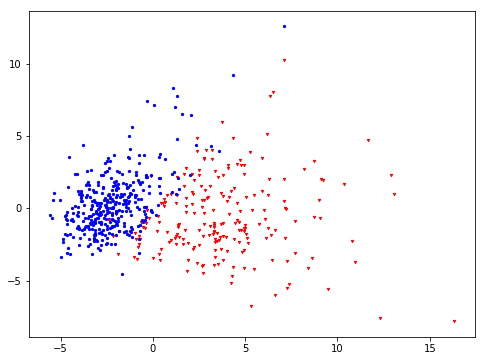

In [53]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(X_all)

m = ['v', 'o']
c = ['r', 'b']
plt.figure(figsize=(8,6))
for i in range(len(y)):
    plt.scatter(pca_result[:,0][i], pca_result[:,1][i],marker=m[y[i]], c=c[y[i]], s=5)
plt.show()